
Model: Logistic Regression
Accuracy: 0.7931034482758621
F1 Score: 0.5384615384615384
ROC-AUC: 0.6863335340156532
Confusion Matrix:
 [[780  78]
 [162 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       858
           1       0.64      0.46      0.54       302

    accuracy                           0.79      1160
   macro avg       0.74      0.69      0.70      1160
weighted avg       0.78      0.79      0.78      1160


Model: Random Forest
Accuracy: 0.7801724137931034
F1 Score: 0.5142857142857143
ROC-AUC: 0.6722278824927832
Confusion Matrix:
 [[770  88]
 [167 135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       858
           1       0.61      0.45      0.51       302

    accuracy                           0.78      1160
   macro avg       0.71      0.67      0.69      1160
weighted avg       0.77      0.78      0.77    

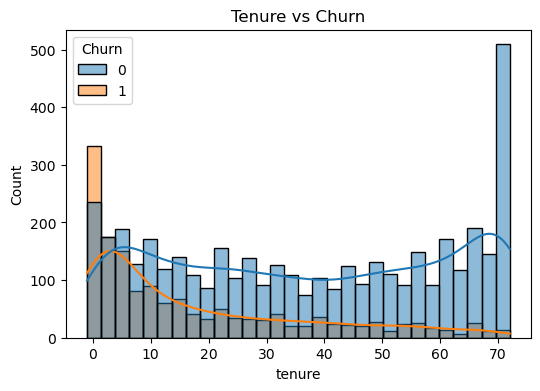

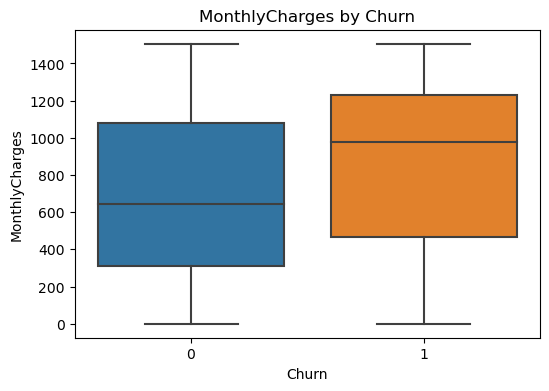

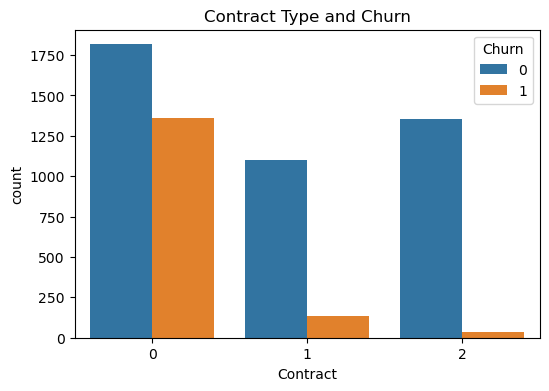

In [ ]:
# 1. Kutubxonalarni chaqirish
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# 2. Datasetni yuklash
df = pd.read_csv("data/telecom_churn.csv")  # Fayl shu papkada bo'lishi kerak

# 3. Tozalash
df.replace(['??', 'unknown', ' '], np.nan, inplace=True)
df.dropna(inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.drop('customerID', axis=1, inplace=True)

# 4. Label Encoding
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# 5. X va y ajratish
X = df.drop('Churn', axis=1)
y = df['Churn']

# 6. Train-Test bo‘lish va masshtablash
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Qayta DataFrame qilish (feature nomlari saqlanishi uchun)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

# 7. Modellar yaratish
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# 8. Baholash funksiyasi
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# 9. Baholash
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

# 10. Model, scaler va ustun nomlarini saqlash
joblib.dump(rf, "model/model.pkl")
joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(X.columns.tolist(), "model/model_cols.pkl")

# 11. Vizual tahlil (bonus)
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title("Tenure vs Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("MonthlyCharges by Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Contract Type and Churn")
plt.show()
